## What is TF-IDF?

- TF stands for Term Frequency and denotes the ratio of number of times a particular word appeared in a Document to total number of words in the document.

   - Term Frequency(TF) = [number of times word appeared / total no of words in a document]

- Term Frequency values ranges between 0 and 1. If a word occurs more number of times, then it's value will be close to 1.



## What is IDF ?

- IDF stands for Inverse Document Frequency and denotes the log of ratio of total number of documents/datapoints in the whole dataset to the number of documents that contains the particular word.

   - Inverse Document Frequency(IDF) = [log(Total number of documents / number of documents that contains the word)]

- In IDF, if a word occured in more number of documents and is common across all documents, then it's value will be less and ratio will approaches to 0.

- Finally:

    - TF-IDF = Term Frequency(TF) * Inverse Document Frequency(IDF)

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    "Thor eating pizza, Loki is eating pizza, Ironman ate pizza already",
    "Apple is announcing new iphone tomorrow",
    "Tesla is announcing new model-3 tomorrow",
    "Google is announcing new pixel-6 tomorrow",
    "Microsoft is announcing new surface tomorrow",
    "Amazon is announcing new eco-dot tomorrow",
    "I am eating biryani and you are eating grapes"
]

In [2]:
#let's create the vectorizer and fit the corpus and transform them accordingly
v = TfidfVectorizer()
v.fit(corpus)
transform_output = v.transform(corpus)

In [3]:
#let's print the vocabulary

print(v.vocabulary_)

{'thor': 25, 'eating': 10, 'pizza': 22, 'loki': 17, 'is': 16, 'ironman': 15, 'ate': 7, 'already': 0, 'apple': 5, 'announcing': 4, 'new': 20, 'iphone': 14, 'tomorrow': 26, 'tesla': 24, 'model': 19, 'google': 12, 'pixel': 21, 'microsoft': 18, 'surface': 23, 'amazon': 2, 'eco': 11, 'dot': 9, 'am': 1, 'biryani': 8, 'and': 3, 'you': 27, 'are': 6, 'grapes': 13}


In [4]:
#let's print the idf of each word:

all_feature_names = v.get_feature_names_out()

for word in all_feature_names:
    
    #let's get the index in the vocabulary
    indx = v.vocabulary_.get(word)
    
    #get the score
    idf_score = v.idf_[indx]
    
    print(f"{word} : {idf_score}")

already : 2.386294361119891
am : 2.386294361119891
amazon : 2.386294361119891
and : 2.386294361119891
announcing : 1.2876820724517808
apple : 2.386294361119891
are : 2.386294361119891
ate : 2.386294361119891
biryani : 2.386294361119891
dot : 2.386294361119891
eating : 1.9808292530117262
eco : 2.386294361119891
google : 2.386294361119891
grapes : 2.386294361119891
iphone : 2.386294361119891
ironman : 2.386294361119891
is : 1.1335313926245225
loki : 2.386294361119891
microsoft : 2.386294361119891
model : 2.386294361119891
new : 1.2876820724517808
pixel : 2.386294361119891
pizza : 2.386294361119891
surface : 2.386294361119891
tesla : 2.386294361119891
thor : 2.386294361119891
tomorrow : 1.2876820724517808
you : 2.386294361119891


In [5]:
#let's print the transformed output from tf-idf
print(transform_output.toarray())

[[0.24266547 0.         0.         0.         0.         0.
  0.         0.24266547 0.         0.         0.40286636 0.
  0.         0.         0.         0.24266547 0.11527033 0.24266547
  0.         0.         0.         0.         0.72799642 0.
  0.         0.24266547 0.         0.        ]
 [0.         0.         0.         0.         0.30652086 0.5680354
  0.         0.         0.         0.         0.         0.
  0.         0.         0.5680354  0.         0.26982671 0.
  0.         0.         0.30652086 0.         0.         0.
  0.         0.         0.30652086 0.        ]
 [0.         0.         0.         0.         0.30652086 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.26982671 0.
  0.         0.5680354  0.30652086 0.         0.         0.
  0.5680354  0.         0.30652086 0.        ]
 [0.         0.         0.         0.         0.30652086 0.
  0.         0.         0.         0.         0.         0.
  0.

- Problem Statement: Given a description about a product sold on e-commerce website, classify it in one of the 4 categories

In [7]:
import pandas as pd

#read the data into a pandas dataframe
df = pd.read_csv("Ecommerce_data.csv")
print(df.shape)
df.head(5)

(24000, 2)


,Text,label
0,"Urban Ladder Eisner Low Back Study-Office Computer Chair(Black) A study in simple. The Eisner study chair has a firm foam cushion, which makes long hours at your desk comfortable. The flexible meshed back is designed for air-circulation and support when you lean back. The curved arms provide ergonomic forearm support. Adjust the height using the gas lift to find that comfortable position and the nylon castors make it easy to move around your space. Chrome legs refer to the images for dimension details any assembly required will be done by the UL team at the time of delivery indoor use only.",Household
1,"Contrast living Wooden Decorative Box,Painted Box, Gift Box, Jewellery Box, Wooden Box Size:- 15x15x8 cm Wooden Hand Crafted and Painted Decorative Box Specification:- * Finish- Antique * Material-Wooden Specialty: Used as Home Decor , Jewellery Box or as a Gift The beautiful and traditional hand made wooden box for home decor. The Royal Wooden Box is designed with beautiful antique finish .It is sure to add a dash of elegance to home decor . It is an ideal gift for your friends and relatives. *Limited Collection*",Household
2,IO Crest SY-PCI40010 PCI RAID Host Controller Card Brings new life to any old desktop PC. Connects up to 4 SATA II high speed SATA hard disk drives. Supports Windows 8 and Server 2012,Electronics
3,"ISAKAA Baby Socks from Just Born to 8 Years- Pack of 4, 6, 8 and 12 ISAKAA presents Soft and Designer baby socks for your little one's feet,it keeps babies feet warm and comfortable. These regular-socks are light in weight and easy to wear. They are a perfect and elegant fit for babies feet which will provide comfort feel all day long. These socks for your little ones are breathable and comfortable to wear. Attractive color and design gives a stylish look. ISAKAA Baby socks helps to keep your little ones feet protected and warm. Made out of super-fine cotton blend fabric socks are stretchable and machine washable. These cute bunch of fabrics are perfect gift for those little feets. Infants loves to crawl and walk around,these socks will protect the little feet and keep it clean. These socks have a pressure-free sensitive elastic to ensure hold without tightness. Their contrast pretty colors and unique designs on each sock makes them irresistible.",Clothing & Accessories
4,Indira Designer Women's Art Mysore Silk Saree With Blouse Piece (Star-Red) This Saree Is Of Art Mysore Silk & Comes With Blouse Piece.,Clothing & Accessories


In [8]:
#check the distribution of labels 
df['label'].value_counts()

Household                 6000
Electronics               6000
Clothing & Accessories    6000
Books                     6000
Name: label, dtype: int64

- From the above, we can see that almost all the labels(classes) occured equal number of times and perfectly balanced. There is no problem of class imbalance and hence no need to apply any balancing techniques like undersampling, oversampling etc.

In [9]:
#Add the new column which gives a unique number to each of these labels 

df['label_num'] = df['label'].map({
    'Household' : 0, 
    'Books': 1, 
    'Electronics': 2, 
    'Clothing & Accessories': 3
})

#checking the results 
df.head(5)

,Text,label,label_num
0,"Urban Ladder Eisner Low Back Study-Office Computer Chair(Black) A study in simple. The Eisner study chair has a firm foam cushion, which makes long hours at your desk comfortable. The flexible meshed back is designed for air-circulation and support when you lean back. The curved arms provide ergonomic forearm support. Adjust the height using the gas lift to find that comfortable position and the nylon castors make it easy to move around your space. Chrome legs refer to the images for dimension details any assembly required will be done by the UL team at the time of delivery indoor use only.",Household,0
1,"Contrast living Wooden Decorative Box,Painted Box, Gift Box, Jewellery Box, Wooden Box Size:- 15x15x8 cm Wooden Hand Crafted and Painted Decorative Box Specification:- * Finish- Antique * Material-Wooden Specialty: Used as Home Decor , Jewellery Box or as a Gift The beautiful and traditional hand made wooden box for home decor. The Royal Wooden Box is designed with beautiful antique finish .It is sure to add a dash of elegance to home decor . It is an ideal gift for your friends and relatives. *Limited Collection*",Household,0
2,IO Crest SY-PCI40010 PCI RAID Host Controller Card Brings new life to any old desktop PC. Connects up to 4 SATA II high speed SATA hard disk drives. Supports Windows 8 and Server 2012,Electronics,2
3,"ISAKAA Baby Socks from Just Born to 8 Years- Pack of 4, 6, 8 and 12 ISAKAA presents Soft and Designer baby socks for your little one's feet,it keeps babies feet warm and comfortable. These regular-socks are light in weight and easy to wear. They are a perfect and elegant fit for babies feet which will provide comfort feel all day long. These socks for your little ones are breathable and comfortable to wear. Attractive color and design gives a stylish look. ISAKAA Baby socks helps to keep your little ones feet protected and warm. Made out of super-fine cotton blend fabric socks are stretchable and machine washable. These cute bunch of fabrics are perfect gift for those little feets. Infants loves to crawl and walk around,these socks will protect the little feet and keep it clean. These socks have a pressure-free sensitive elastic to ensure hold without tightness. Their contrast pretty colors and unique designs on each sock makes them irresistible.",Clothing & Accessories,3
4,Indira Designer Women's Art Mysore Silk Saree With Blouse Piece (Star-Red) This Saree Is Of Art Mysore Silk & Comes With Blouse Piece.,Clothing & Accessories,3


## Train test split
Build a model with original text (no pre processing)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.Text, 
    df.label_num, 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.label_num
)

In [11]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (19200,)
Shape of X_test:  (4800,)


In [12]:
X_train.head()


15820    IRIS Furniture Children Deluxe Spiderman Toddl...
23224    Godox CB-09 Hard Carrying Storage Suitcase Car...
4638     Ugreen All in 1 USB 3.0 Card Reader USB Memory...
15245    Spread Spain Metallic Gold Bar Trolley/Kitchen...
5378     Chromozome Men's Calf Socks (Pack of 3) (SX-3 ...
Name: Text, dtype: object

In [13]:
y_train.value_counts()


0    4800
2    4800
3    4800
1    4800
Name: label_num, dtype: int64

In [14]:
y_test.value_counts()


0    1200
2    1200
3    1200
1    1200
Name: label_num, dtype: int64

## Attempt 1 :

- using sklearn pipeline module create a classification pipeline to classify the Ecommerce Data.

- use TF-IDF for pre-processing the text.

- use KNN as the classifier

- print the classification report.

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('KNN', KNeighborsClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

2023-04-17 15:49:31,738 [28056] WARNING  py.warnings:109: [JupyterRequire] /home/kathan/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)



              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1200
           1       0.97      0.95      0.96      1200
           2       0.97      0.97      0.97      1200
           3       0.97      0.98      0.97      1200

    accuracy                           0.96      4800
   macro avg       0.96      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800



In [16]:
X_test[:5]

20706    Lal Haveli Designer Handmade Patchwork Decorat...
19166    GOTOTOP Classical Retro Cotton & PU Leather Ne...
15209    FabSeasons Camouflage Polyester Multi Function...
2462     Indian Superfoods: Change the Way You Eat Revi...
6621     Milton Marvel Insulated Steel Casseroles, Juni...
Name: Text, dtype: object

In [17]:

y_test[:5]

20706    0
19166    2
15209    3
2462     1
6621     3
Name: label_num, dtype: int64

In [18]:
y_pred[:5]

array([0, 2, 3, 1, 0])

## Attempt 2 :
    
- use TF-IDF for pre-processing the text.

- use MultinomialNB as the classifier.

- print the classification report.

In [19]:
from sklearn.naive_bayes import MultinomialNB


#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('Multi NB', MultinomialNB())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1200
           1       0.98      0.92      0.95      1200
           2       0.97      0.97      0.97      1200
           3       0.97      0.99      0.98      1200

    accuracy                           0.96      4800
   macro avg       0.96      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800



## Attempt 3 :

- use TF-IDF for pre-processing the text.

- use Random Forest as the classifier.

- print the classification report.

In [20]:
from sklearn.ensemble import RandomForestClassifier

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter 
     ('Random Forest', RandomForestClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1200
           1       0.97      0.97      0.97      1200
           2       0.98      0.97      0.97      1200
           3       0.98      0.99      0.98      1200

    accuracy                           0.97      4800
   macro avg       0.97      0.97      0.97      4800
weighted avg       0.97      0.97      0.97      4800



## Use text pre-processing to remove stop words, punctuations and apply lemmatization

In [21]:
### utlity function for pre-processing the text
import spacy

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm") 

def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens) 

2023-04-17 15:49:57.816420: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-17 15:49:58.516175: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [22]:
df['preprocessed_txt'] = df['Text'].apply(preprocess) 

In [23]:
df.head()

,Text,label,label_num,preprocessed_txt
0,"Urban Ladder Eisner Low Back Study-Office Computer Chair(Black) A study in simple. The Eisner study chair has a firm foam cushion, which makes long hours at your desk comfortable. The flexible meshed back is designed for air-circulation and support when you lean back. The curved arms provide ergonomic forearm support. Adjust the height using the gas lift to find that comfortable position and the nylon castors make it easy to move around your space. Chrome legs refer to the images for dimension details any assembly required will be done by the UL team at the time of delivery indoor use only.",Household,0,Urban Ladder Eisner low Study Office Computer Chair(Black study simple Eisner study chair firm foam cushion make long hour desk comfortable flexible mesh design air circulation support lean curved arm provide ergonomic forearm support adjust height gas lift find comfortable position nylon castor easy space chrome leg refer image dimension detail assembly require UL team time delivery indoor use
1,"Contrast living Wooden Decorative Box,Painted Box, Gift Box, Jewellery Box, Wooden Box Size:- 15x15x8 cm Wooden Hand Crafted and Painted Decorative Box Specification:- * Finish- Antique * Material-Wooden Specialty: Used as Home Decor , Jewellery Box or as a Gift The beautiful and traditional hand made wooden box for home decor. The Royal Wooden Box is designed with beautiful antique finish .It is sure to add a dash of elegance to home decor . It is an ideal gift for your friends and relatives. *Limited Collection*",Household,0,contrast live Wooden Decorative Box Painted Box Gift Box Jewellery Box Wooden Box Size:- 15x15x8 cm Wooden Hand Crafted Painted Decorative Box specification:- Finish- Antique Material Wooden Specialty Home Decor Jewellery Box gift beautiful traditional hand wooden box home decor Royal Wooden Box design beautiful antique finish .It sure add dash elegance home decor ideal gift friend relative Limited Collection
2,IO Crest SY-PCI40010 PCI RAID Host Controller Card Brings new life to any old desktop PC. Connects up to 4 SATA II high speed SATA hard disk drives. Supports Windows 8 and Server 2012,Electronics,2,IO Crest SY PCI40010 PCI raid Host Controller Card Brings new life old desktop pc connect 4 SATA II high speed SATA hard disk drive support Windows 8 Server 2012
3,"ISAKAA Baby Socks from Just Born to 8 Years- Pack of 4, 6, 8 and 12 ISAKAA presents Soft and Designer baby socks for your little one's feet,it keeps babies feet warm and comfortable. These regular-socks are light in weight and easy to wear. They are a perfect and elegant fit for babies feet which will provide comfort feel all day long. These socks for your little ones are breathable and comfortable to wear. Attractive color and design gives a stylish look. ISAKAA Baby socks helps to keep your little ones feet protected and warm. Made out of super-fine cotton blend fabric socks are stretchable and machine washable. These cute bunch of fabrics are perfect gift for those little feets. Infants loves to crawl and walk around,these socks will protect the little feet and keep it clean. These socks have a pressure-free sensitive elastic to ensure hold without tightness. Their contrast pretty colors and unique designs on each sock makes them irresistible.",Clothing & Accessories,3,ISAKAA Baby Socks bear 8 Years- Pack 4 6 8 12 ISAKAA present soft designer baby sock little foot keep baby foot warm comfortable regular sock light weight easy wear perfect elegant fit baby foot provide comfort feel day long sock little one breathable comfortable wear attractive color design give stylish look ISAKAA Baby sock help little one foot protect warm super fine cotton blend fabric sock stretchable machine washable cute bunch fabric perfect gift little feet infant love crawl walk sock protect little foot clean sock pressure free sensitive elastic ensure hold tightness contrast pretty color unique design sock make irresistible
4,Indi

In [24]:

df.Text[0]

'Urban Ladder Eisner Low Back Study-Office Computer Chair(Black) A study in simple. The Eisner study chair has a firm foam cushion, which makes long hours at your desk comfortable. The flexible meshed back is designed for air-circulation and support when you lean back. The curved arms provide ergonomic forearm support. Adjust the height using the gas lift to find that comfortable position and the nylon castors make it easy to move around your space. Chrome legs refer to the images for dimension details any assembly required will be done by the UL team at the time of delivery indoor use only.'

In [25]:
df.preprocessed_txt[0]

'Urban Ladder Eisner low Study Office Computer Chair(Black study simple Eisner study chair firm foam cushion make long hour desk comfortable flexible mesh design air circulation support lean curved arm provide ergonomic forearm support adjust height gas lift find comfortable position nylon castor easy space chrome leg refer image dimension detail assembly require UL team time delivery indoor use'

- Build a model with pre processed text

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    df.preprocessed_txt, 
    df.label_num,
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.label_num
)

-- Let's check the scores with our best model till now

- Random Forest

In [27]:
#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter 
     ('Random Forest', RandomForestClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1200
           1       0.98      0.98      0.98      1200
           2       0.98      0.97      0.98      1200
           3       0.98      0.99      0.99      1200

    accuracy                           0.98      4800
   macro avg       0.98      0.98      0.98      4800
weighted avg       0.98      0.98      0.98      4800



- If you compare above classification report with respect to RandomForest Model with the one from unprocessed text, you will find some improvement in the model that uses preprocessed cleaned up text. The F1 score improved in the case of preprocessed data. Hence we can conclude that for this particular problem using preprocessing (removing stop words, lemmatization) is improving the performance of the model.

# Plot confusion matrix

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1158,    9,   16,   17],
       [  19, 1173,    5,    3],
       [  20,    8, 1168,    4],
       [   6,    4,    1, 1189]])

Text(95.72222222222221, 0.5, 'Truth')

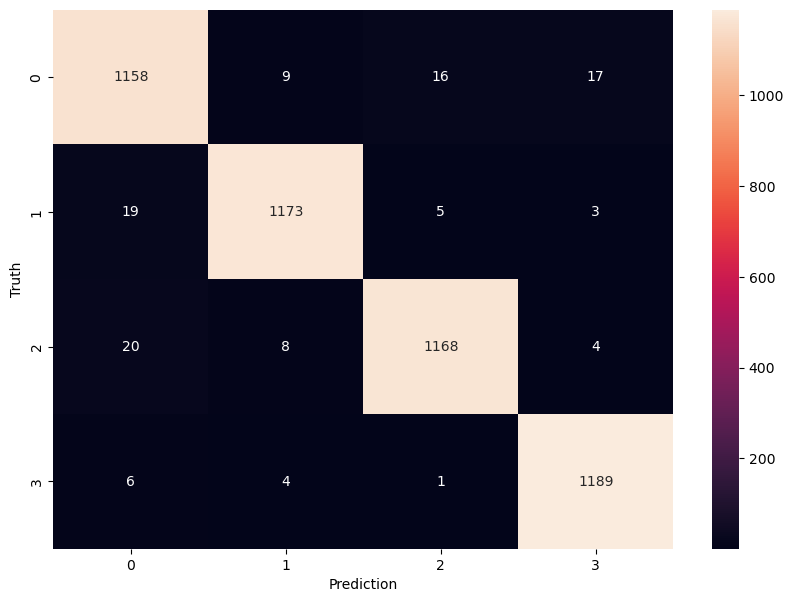

In [29]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

# Exercise

In [30]:
import pandas as pd


#read the dataset with name "Emotion_classify_Data.csv" and store it in a variable df
df = pd.read_csv("Emotion_classify_Data.csv")

#print the shape of dataframe
print(df.shape)

#print top 5 rows
df.head(5)

(5937, 2)


,Comment,Emotion
0,i seriously hate one subject to death but now i feel reluctant to drop it,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feelings and i think that i am afraid to accept the possibility that he might not make it,fear
3,ive been really angry with r and i feel like an idiot for trusting him in the first place,joy
4,i feel suspicious if there is no one outside like the rapture has happened or something,fear


In [31]:
#check the distribution of Emotion
df['Emotion'].value_counts()

anger    2000
joy      2000
fear     1937
Name: Emotion, dtype: int64

- From the above, we can see that almost the Emotions(classes) occured equal number of times and balanced. There is no problem of class imbalance and hence no need to apply any balancing techniques like undersampling, oversampling etc.

In [32]:
#Add the new column "Emotion_num" which gives a unique number to each of these Emotions

df['Emotion_num'] = df['Emotion'].map({'joy' : 0, 'fear': 1, 'anger': 2})

#checking the results 
df.head(5)


,Comment,Emotion,Emotion_num
0,i seriously hate one subject to death but now i feel reluctant to drop it,fear,1
1,im so full of life i feel appalled,anger,2
2,i sit here to write i start to dig out my feelings and i think that i am afraid to accept the possibility that he might not make it,fear,1
3,ive been really angry with r and i feel like an idiot for trusting him in the first place,joy,0
4,i feel suspicious if there is no one outside like the rapture has happened or something,fear,1


In [33]:
# Modelling without Pre-processing Text data

In [34]:
#Do the 'train-test' splitting with test size of 20%

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.Comment, 
    df.Emotion_num, 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.Emotion_num
)

In [35]:
#print the shapes

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (4749,)
Shape of X_test:  (1188,)


## Attempt 1 :

- using CountVectorizer with only trigrams.
- use RandomForest as the classifier.
- print the classification report.

In [36]:
#1. create a pipeline object

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf = Pipeline([
    ('vectorizer_tri_grams', CountVectorizer(ngram_range = (3, 3))),                       #using the ngram_range parameter 
    ('random_forest', (RandomForestClassifier()))         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.24      0.34       400
           1       0.36      0.82      0.50       388
           2       0.52      0.19      0.28       400

    accuracy                           0.41      1188
   macro avg       0.49      0.42      0.37      1188
weighted avg       0.49      0.41      0.37      1188



## Attempt 2 :

- using CountVectorizer with both unigram and bigrams.
- use Multinomial Naive Bayes as the classifier.
- print the classification report.

In [37]:
from sklearn.naive_bayes import MultinomialNB


#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_bigrams', CountVectorizer(ngram_range = (1, 2))),        #using the ngram_range parameter 
     ('Multi NB', MultinomialNB())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       400
           1       0.87      0.83      0.85       388
           2       0.83      0.88      0.85       400

    accuracy                           0.86      1188
   macro avg       0.86      0.86      0.86      1188
weighted avg       0.86      0.86      0.86      1188



## Attempt 3 :

- using CountVectorizer with both unigram and bigrams.
- use RandomForest as the classifier.
- print the classification report.


In [38]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_bi_grams', CountVectorizer(ngram_range = (1, 2))),                       #using the ngram_range parameter 
    ('random_forest', (RandomForestClassifier()))         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       400
           1       0.95      0.89      0.92       388
           2       0.94      0.87      0.90       400

    accuracy                           0.91      1188
   macro avg       0.91      0.91      0.91      1188
weighted avg       0.91      0.91      0.91      1188



## Attempt 4 :

- using TF-IDF vectorizer for pre-processing the text.
- use RandomForest as the classifier.
- print the classification report.

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer


#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        
     ('Random Forest', RandomForestClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       400
           1       0.93      0.89      0.91       388
           2       0.93      0.86      0.90       400

    accuracy                           0.91      1188
   macro avg       0.91      0.91      0.91      1188
weighted avg       0.91      0.91      0.91      1188



# Use text pre-processing to remove stop words, punctuations and apply lemmatization

In [40]:
import spacy

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm") 


#use this utility function to get the preprocessed text data
def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens) 


In [41]:
# create a new column "preprocessed_comment" and use the utility function above to get the clean data
# this will take some time, please be patient
df['preprocessed_comment'] = df['Comment'].apply(preprocess) 

In [42]:
#Do the 'train-test' splitting with test size of 20% with random state of 2022 and stratify sampling too
#Note: Use the preprocessed_Comment
X_train, X_test, y_train, y_test = train_test_split(
    df.preprocessed_comment, 
    df.Emotion_num, 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.Emotion_num
)

## Attempt1 :

- using CountVectorizer with both unigrams and bigrams.
- use RandomForest as the classifier.
- print the classification report. 

In [43]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_bi_grams', CountVectorizer(ngram_range = (1, 2))),                       #using the ngram_range parameter 
    ('random_forest', (RandomForestClassifier()))         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       400
           1       0.94      0.91      0.93       388
           2       0.91      0.93      0.92       400

    accuracy                           0.93      1188
   macro avg       0.93      0.93      0.93      1188
weighted avg       0.93      0.93      0.93      1188



## Attempt 2 :

- using TF-IDF vectorizer for pre-processing the text.
- use RandomForest as the classifier.
- print the classification report.

In [44]:
#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter 
     ('Random Forest', RandomForestClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       400
           1       0.94      0.93      0.93       388
           2       0.94      0.92      0.93       400

    accuracy                           0.94      1188
   macro avg       0.94      0.94      0.94      1188
weighted avg       0.94      0.94      0.94      1188



### Final Observations
- As part of this exercise we have trained the data with algorithms like Multinomial Naive Bayes and Random Forest which are most used and provide good results for text related problems.

- As Machine learning algorithms do not work on text data directly, we need to convert them into numeric vectors and feed that into models while training. For this purpose, we have used Bag of words(unigrams, bigrams, n-grams) and TF-IDF text representation techniques.

### Key Findings

- As the n_gram range keeps increasing, there's drastic fall of improvement in performance metrics.

- There's seen a significant improvement in results before pre-processing and after pre-processing the data.

- TF-IDF and Bag of words both performed equally well in performance metrics like Recall and F1-score.

- Random Forest performed quite well when compared to Multinomial Naive Bayes.



# END